# <span style="color:blue">Python para cientistas</span>

## <span style="color:blue">Ajuste dados experimentais por regressão linear</span>
---


***Problema***


Vamos considerar o problema da determinação da constante de Planck h, a partir de dados obtidos
numa experiência com uma célula fotoelétrica, que consistem numa série de valores do potencial de
paragem $𝑉_𝑝$, em função do comprimento de onda da luz incidente na célula.

Utilizando a lei de Planck:

$$
E = h × ν
$$

em que $E$ é a energia de um foton e $\nu$
a sua frequência, e a lei de conservação da energia pode
escrever-se:

$$
𝑒𝑉_𝑝 = ℎν − W
$$

$$
y = mx + b
$$

em que $𝑊$ é a energia de arranque da célula, considerada constante para cada célula.  A partir da sua equação, Einstein fez a seguinte previsão: variando-se a freqüência, $ν$, da luz incidente e plotando-se $V_p$ versus $\nu$, obtêm-se uma reta, cujo coeficiente angular deve ser $h$, sendo $h$ uma constante universal, independente do material irradiado. Esta constante é conhecida como constante de Planck, determinada pela lei de radiação.

**O problema consiste, portanto, em:** dados $(𝑉_{𝑝,𝑘}, 𝜈_𝑘)(𝑘 = 1,2, … , 𝑁)$, calcular a melhor aproximação
possível (num sentido a definir) para $ℎ$. A solução do problema fornecerá igualmente um valor para
$𝑊$.



Frequência: 7.50e+14 Hz -> Vp previsto (IA/ML): 2.370 V
Frequência: 8.00e+14 Hz -> Vp previsto (IA/ML): 2.740 V


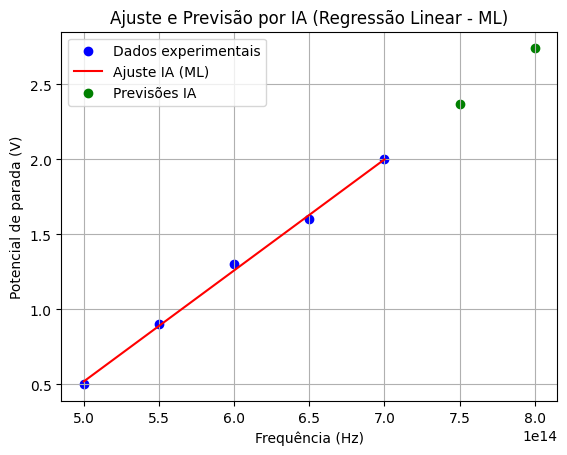

In [26]:

# ------------------
# IA: Previsão com Regressão Linear (Machine Learning)
# ------------------
# Neste bloco, ao invés de usar apenas o modelo físico para ajuste,
# aplicamos um algoritmo de IA (Machine Learning) - Regressão Linear -
# para aprender a relação entre a frequência (ν) e o potencial de parada (Vp)
# a partir dos dados experimentais, e então prever novos valores.

from sklearn.linear_model import LinearRegression
import numpy as np

# Dados experimentais
# Frequência da luz incidente (ν) em Hz
# Potencial de parada (Vp) em Volts
# Obs: Valores fictícios apenas para exemplificação
nu = np.array([5.0e14, 5.5e14, 6.0e14, 6.5e14, 7.0e14]).reshape(-1, 1)  # Variável independente
Vp = np.array([0.5, 0.9, 1.3, 1.6, 2.0])  # Variável dependente

# Criando o modelo de Machine Learning
# A regressão linear vai ajustar Vp = m * ν + b sem depender explicitamente da equação física.
model = LinearRegression()

# "Treinando" o modelo com os dados experimentais
model.fit(nu, Vp)

# Definindo novas frequências para prever o potencial de parada
novas_frequencias = np.array([[7.5e14], [8.0e14]])

# Usando o modelo treinado para prever Vp para as novas frequências
Vp_previsto_ml = model.predict(novas_frequencias)

# Exibindo resultados das previsões
for freq, vp in zip(novas_frequencias.flatten(), Vp_previsto_ml):
    print(f"Frequência: {freq:.2e} Hz -> Vp previsto (IA/ML): {vp:.3f} V")

# ------------------
# Visualização gráfica
# ------------------
import matplotlib.pyplot as plt

# Pontos originais do experimento
plt.scatter(nu, Vp, color='blue', label='Dados experimentais')

# Linha de ajuste obtida pelo modelo de IA (ML)
plt.plot(nu, model.predict(nu), color='red', label='Ajuste IA (ML)')

# Pontos de previsão para novas frequências
plt.scatter(novas_frequencias, Vp_previsto_ml, color='green', label='Previsões IA')

# Configurações do gráfico
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potencial de parada (V)')
plt.title('Ajuste e Previsão por IA (Regressão Linear - ML)')
plt.legend()
plt.grid(True)
plt.show()
